In [1]:
#preprocessing 1..........................................................
 
import matplotlib.pyplot as plt
 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.svm import LinearSVC

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

#important sources: https://radimrehurek.com/gensim/models/ldamodel.html


In [2]:
import numpy as np
import pickle
global class_labels
class_labels=pickle.load(open('C:/users/karm_ch/downloads/class_labels_eusar.txt', 'rb'))
print(len(class_labels))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_labels)
labels=le.transform(class_labels)

X_=np.zeros((19500,50))
Y_=np.zeros((19500,50))

X_=np.load("word_count_documents_eusar.npy")
X_=np.true_divide(X_,4096)

Y_ = labels

for n in range(0,11):
    for i in range(len(class_labels)):
        if(Y_[i]==n):
            print(int(Y_[i]),class_labels[i])
            break
            
from collections import Counter

Counter(list(Y_)).keys() # equals to list(set(words))
Counter(list(Y_)).values() 

19500
0 Black_border
1 Floating_Ice
2 Glacier
3 Icebergs
4 Mealted_Snow_Ice_in_Mountains
5 Mountains
6 Sea1_Old_ice
7 Sea2_First_year_ice
8 Sea3_young_ice
9 Water_Ice_Currents
10 Water_bodies


dict_values([585, 2480, 1516, 3571, 6423, 1429, 240, 1812, 723, 500, 221])

In [3]:
X_filtered=[]
Y_filtered=[]
count=0
for i in range (len(Y_)):
    if ( Y_[i]==3 or Y_[i]==5 or Y_[i]==6 or Y_[i]==7):
        X_filtered.append(X_[i])
        Y_filtered.append(Y_[i])
        count+=1
print(count)

11438


In [4]:
count1=0
count2=0
Y_=np.array(Y_filtered)
X_=np.array(X_filtered)
for i in range (len(Y_)):
    if(Y_[i] == 3 or Y_[i]== 5):
        Y_[i]=1
        count1+=1
    else:
        Y_[i]=2
        count2+=1
        
print(count1,count2)

7146 4292


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.25, random_state=42)

In [6]:

#model_2 = LinearSVC(random_state=0, tol=1e-5)
#model_2.fit(X_train, y_train) 
import shap

svm_chi_5 = SVC(kernel=chi2_kernel, probability=True).fit(X_train, Y_train)
    
Y_pred = svm_chi_5.predict(X_test)
 


#Y_pred=model_2.predict(X_test)
n_classes=2
#target_names=list(set(class_labels))
print("Predicting land cover class on the test set")

#Y_pred = clf.predict(X_test)
# use Kernel SHAP to explain test set predictions

import pandas
X_train= pandas.core.frame.DataFrame(X_train)
X_test= pandas.core.frame.DataFrame(X_test)

explainer = shap.KernelExplainer(svm_chi_5.predict_proba, X_train[0:10], link="logit")
shap_values = explainer.shap_values(X_test[0:10], nsamples=10)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")


print(classification_report(Y_test, Y_pred))
#print(confusion_matrix(Y_test, Y_pred, labels=range(n_classes)))


Predicting land cover class on the test set


Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.226e-01, with an active set of 1 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.113e-01, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.113e-01, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.457e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.751e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.700e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.311e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.654e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.239e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.239e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.084e-01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=5.776e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.010e-01, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.007e-01, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.007e-01, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.000e-01, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.367e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.367e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.318e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.098e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=8.494e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.211e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.211e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.786e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.616e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.414e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.373e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.309e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=9.928e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=8.546e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.246e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.246e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a 


              precision    recall  f1-score   support

           1       0.95      0.93      0.94      1784
           2       0.89      0.92      0.91      1076

    accuracy                           0.93      2860
   macro avg       0.92      0.93      0.92      2860
weighted avg       0.93      0.93      0.93      2860



In [12]:
#how do these BoW features model each class, how well do they seperate?
import numpy as np
labels=np.load("C:\\Users\\karm_ch\\Documents\\code\\lda_timeseries\\pred_labels\\0.npy")

print(np.unique(labels))

[0.000e+00 2.000e+00 3.000e+00 5.000e+00 6.000e+00 7.000e+00 8.000e+00
 1.491e+04]


In [18]:
all_labels=np.zeros((24,6400))

for i in range(0,24):
    all_labels[i,:]=np.load("C:\\Users\\karm_ch\\Documents\\code\\lda_timeseries\\pred_labels\\"+str(i)+".npy")
    

In [40]:
import pandas as pd

class_0_bow=[]
class_2_bow=[]
class_3_bow=[]
class_5_bow=[]
class_6_bow=[]
class_8_bow=[]
class_14910_bow=[]

for i in range (0,24):
    bow=np.load("C:\\Users\\karm_ch\\Documents\\code\\lda_timeseries\\bow\\bow_"+str(i)+".npy")
    label=all_labels[i,:]
    for j in range(0,6400):
        if(label[j] == 0):
            class_0_bow.append(bow[j,:])
            
        elif(label[j]==2):
            class_2_bow.append(bow[j,:])
            
        elif(label[j]==3):
            class_3_bow.append(bow[j,:])
            
        elif(label[j]==5):
            class_5_bow.append(bow[j,:])
            
        elif(label[j]==6):
            class_6_bow.append(bow[j,:])
            
        elif(label[j]==8):
            class_8_bow.append(bow[j,:])
            
        elif(label[j]==14910):
            class_14910_bow.append(bow[j,:])
            
df_class_0_bow=pd.DataFrame(class_0_bow)
df.to_csv("class_0_bow.csv",index=False)

df_class_2_bow=pd.DataFrame(class_2_bow)
df.to_csv("class_2_bow.csv",index=False)

df_class_3_bow=pd.DataFrame(class_3_bow)
df.to_csv("class_3_bow.csv",index=False)

df_class_5_bow=pd.DataFrame(class_5_bow)
df.to_csv("class_5_bow.csv",index=False)

df_class_6_bow=pd.DataFrame(class_6_bow)
df.to_csv("class_6_bow.csv",index=False)

df_class_8_bow=pd.DataFrame(class_8_bow)
df.to_csv("class_8_bow.csv",index=False)

df_class_14910_bow=pd.DataFrame(class_14910_bow)
df.to_csv("class_14910_bow.csv",index=False)

In [31]:
type(class_2_bow[3])

numpy.ndarray

In [39]:
import pandas as pd

df = pd.DataFrame(class_8_bow)
df.to_csv('class_8_bow.csv',index=False)

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,1.0,331.0,0.0,0.0,0.0,...,135.0,22.0,0.0,84.0,412.0,356.0,98.0,0.0,277.0,19.0
1,0.0,0.0,1.0,0.0,0.0,0.0,580.0,0.0,0.0,0.0,...,48.0,22.0,0.0,17.0,502.0,610.0,24.0,1.0,343.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,369.0,0.0,0.0,0.0,...,102.0,16.0,0.0,374.0,312.0,376.0,92.0,0.0,716.0,13.0
3,0.0,0.0,1.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,...,71.0,9.0,1.0,12.0,490.0,513.0,59.0,0.0,222.0,4.0
4,0.0,3.0,0.0,0.0,0.0,0.0,568.0,0.0,0.0,0.0,...,54.0,11.0,0.0,39.0,513.0,606.0,15.0,1.0,423.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28733,0.0,0.0,0.0,0.0,0.0,0.0,421.0,0.0,0.0,0.0,...,65.0,15.0,0.0,2.0,613.0,405.0,29.0,0.0,89.0,11.0
28734,0.0,1.0,0.0,0.0,0.0,0.0,445.0,0.0,0.0,0.0,...,58.0,9.0,0.0,3.0,608.0,454.0,20.0,1.0,114.0,10.0
28735,0.0,2.0,3.0,0.0,0.0,0.0,559.0,0.0,0.0,0.0,...,26.0,8.0,0.0,2.0,677.0,535.0,7.0,1.0,142.0,9.0
28736,0.0,0.0,0.0,0.0,0.0,0.0,799.0,0.0,0.0,0.0,...,10.0,4.0,0.0,19.0,571.0,719.0,5.0,0.0,312.0,1.0


In [11]:
import glob
import os
for filename in glob.glob('C:\\Users\\karm_ch\\Documents\\code\\lda_timeseries\\bow\\*.npy'):
    print(filename)
    

C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_0.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_1.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_10.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_11.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_12.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_13.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_14.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_15.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_16.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_17.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_18.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_19.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_2.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_20.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_21.npy
C:\Users\karm_ch\Documents\code\lda_timeseries\bow\bow_22.npy
C:\Users\ka

In [32]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

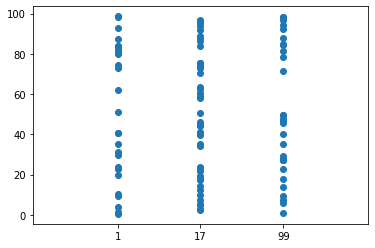

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({"x" : np.random.choice([1,17,99], size=100),
                   "y" : np.random.rand(100)*100})

plt.scatter(df["x"].astype(str), df["y"])
plt.margins(x=0.5)
plt.show()

In [42]:
from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(svm_chi_7, 'classifier7_(6)_(7).pkl') 
# and later you can load it
#clf = joblib.load('filename.pkl')

['classifier7_(6)_(7).pkl']